In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\HP\AppData\Local\Temp\ipykernel_10072\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
# %matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

100%|██████████| 25.4k/25.4k [00:00<00:00, 4.49MB/s]

Extracting files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


In [3]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [5]:
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'C:\\Users\\r.bennetayeb\\Desktop\\these\\Enseignement\\SAE_projet\\Data\\ds_salaries.csv'

In [2]:
# Lire le fichier depuis le répertoire du projet


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [4]:
#données manquantes 
data.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Text(0.5, 1.0, 'Distribution des salaires en USD')

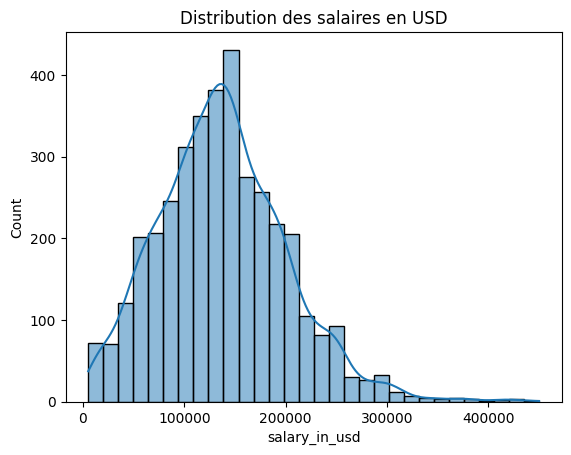

In [5]:
# Distribution des salaires en USD
sns.histplot(data['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution des salaires en USD')

In [7]:
# liste des pays concerné par l'étude 
data['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [9]:
#Salaire moyen par rôle
s1 = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
s1.head(10)


job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

In [10]:
# Salaire moyen par pays
s2 = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
s2.head(10)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64

In [11]:

# Salaires moyens par niveau d'expérience
s3 = data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
s3.head(10)

experience_level
EX    194930.929825
SE    153051.071542
MI    104525.939130
EN     78546.284375
Name: salary_in_usd, dtype: float64

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [ ]:
# Filtrer les salaires pour un pays donné (ex : US)
JP = data["employee_residence"=='US']

      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [10]:
# Top 5 des entreprises qui paient le plus

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64

In [18]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)


Rôles avec un salaire moyen > 100,000 USD : job_title
AI Developer                                136666.090909
AI Scientist                                110120.875000
Analytics Engineer                          152368.631068
Applied Data Scientist                      113726.300000
Applied Machine Learning Scientist          109452.833333
Applied Scientist                           190264.482759
BI Analyst                                  104888.888889
BI Developer                                129846.153846
Big Data Architect                          125802.500000
Business Intelligence Engineer              174150.000000
Cloud Data Architect                        250000.000000
Cloud Database Engineer                     155000.000000
Computer Vision Engineer                    143536.111111
Data Analyst                                108716.227124
Data Analytics Lead                         211254.500000
Data Analytics Manager                      141879.090909
Data Architect    

In [12]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# Comparer salaires moyens pour deux catégories



Salaire moyen des employés à distance : 136481.45283018867
Salaire moyen (tech) : 143629.96173351776
Salaire moyen (non-tech) : nan


In [16]:
# Ajouter une colonne pour les fourchettes de salaires



Données avec fourchettes de salaires :    salary_in_usd salary_range
0          85847     50k-100k
1          30000         <50k
2          25500         <50k
3         175000        150k+
4         120000    100k-150k
Pays avec les salaires moyens les plus élevés : employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
Name: salary_in_usd, dtype: float64


In [ ]:
# Analyse des corrélations
# Relation entre télétravail et salaire


In [ ]:
# Salaire moyen par taille d'entreprise


In [ ]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = data.pivot_table(
    index='', 
    columns='', 
    values='', 
    aggfunc=''
)
print("Tableau croisé des salaires :", pivot_table)